In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_frame=pd.read_csv("Financial Analytics data.csv")

In [3]:
data_frame.shape

(488, 5)

In [4]:
data_frame

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [5]:
[data_frame.columns]

[Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')]

In [6]:
data_frame.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [7]:
data_frame.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [8]:
def shift_row(row):
    if pd.isna(row['Sales Qtr - Crore']):
        row['Sales Qtr - Crore'] = row['Unnamed: 4']
        row['Unnamed: 4'] = None
    return row

df = data_frame.apply(shift_row, axis=1)

In [9]:
df.drop(["S.No.","Unnamed: 4"], axis=1, inplace=True)

In [10]:
zero_sales_qtr = df[df['Sales Qtr - Crore'] == 0]
print(zero_sales_qtr)

                 Name  Mar Cap - Crore  Sales Qtr - Crore
393  Ujjivan Fin.Ser.          4293.42                0.0


In [11]:
df.loc[df['Sales Qtr - Crore'] == 0, 'Sales Qtr - Crore'] = np.nan

In [12]:
df.isnull().sum()

Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    30
dtype: int64

In [13]:
df.dropna(inplace=True)

In [22]:
df

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
...,...,...,...
482,Prime Focus,3031.50,609.61
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53


In [23]:
df.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,458.000000,458.000000
mean,28924.636921,3816.103362
std,60612.374180,9998.783508
min,3017.070000,19.420000
25%,4964.322500,536.135000
50%,10446.325000,1140.585000
75%,24747.930000,2742.417500
max,583436.720000,110666.930000


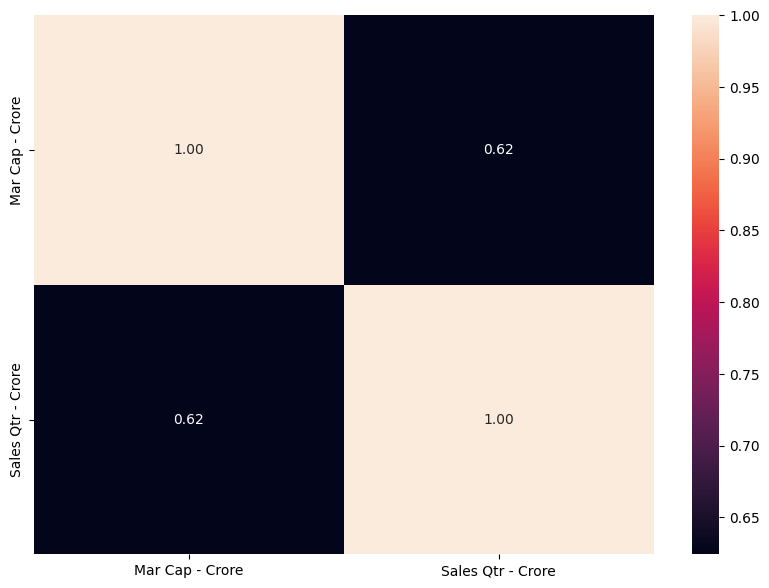

In [24]:
co_matrix_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,7))
sns.heatmap(co_matrix_df.corr(), annot=True, fmt='.2f')
plt.show()

C:\Users\DHRUV GUPTA\AppData\Local\Temp\ipykernel_1696\2766792287.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mar Cap - Crore', dodge=False, palette=['#4f772d'])


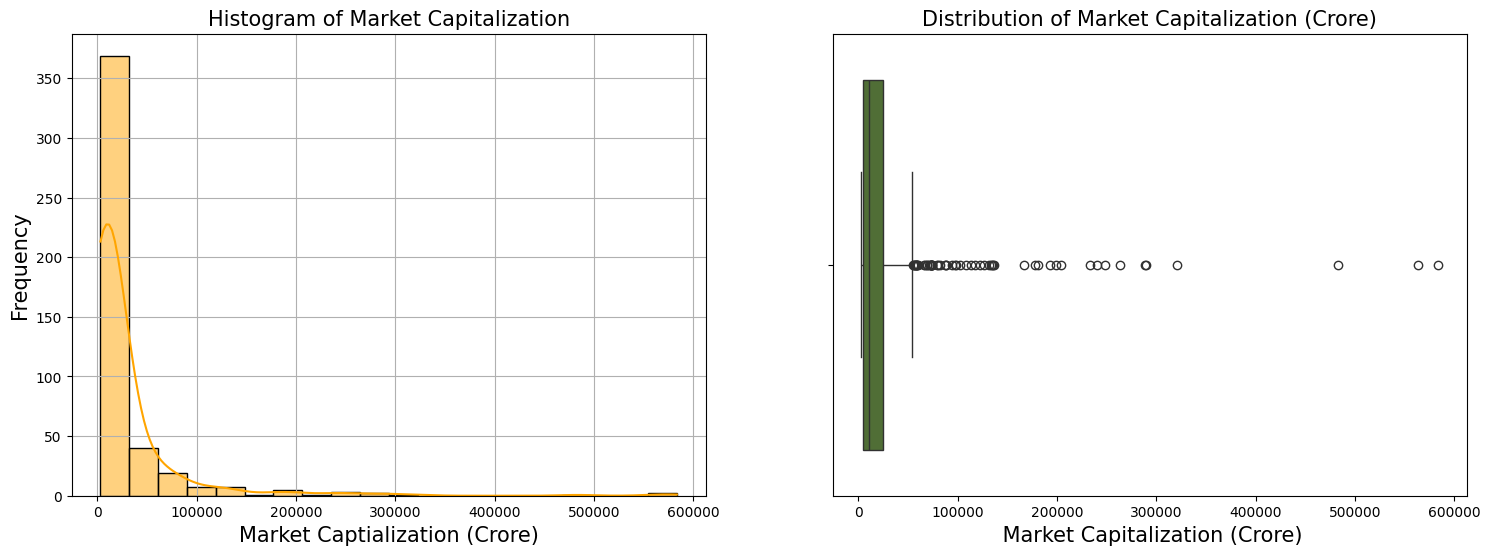

In [25]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.histplot(df['Mar Cap - Crore'], bins=20, color='orange', edgecolor='black', kde=True)
plt.title('Histogram of Market Capitalization', fontsize=15)
plt.xlabel('Market Captialization (Crore)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)


plt.subplot(1,2,2)
sns.boxplot(data=df, x='Mar Cap - Crore', dodge=False, palette=['#4f772d'])
plt.title('Distribution of Market Capitalization (Crore)', fontsize=15)
plt.xlabel(' Market Capitalization (Crore)', fontsize=15)


plt.show()

C:\Users\DHRUV GUPTA\AppData\Local\Temp\ipykernel_1696\3698597683.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sales Qtr - Crore', dodge=False, palette=['#183a37'])


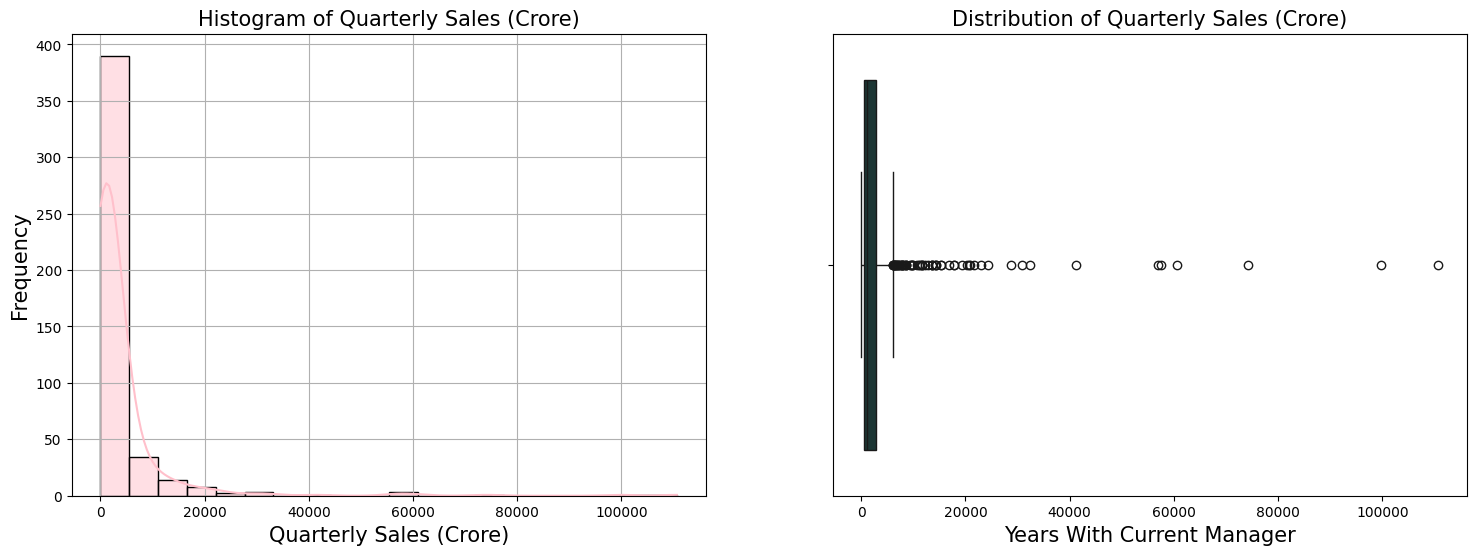

In [26]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
sns.histplot(df['Sales Qtr - Crore'], bins=20, color='pink', edgecolor='black', kde=True)
plt.title('Histogram of Quarterly Sales (Crore)', fontsize=15)
plt.xlabel('Quarterly Sales (Crore)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Sales Qtr - Crore', dodge=False, palette=['#183a37'])
plt.title('Distribution of Quarterly Sales (Crore)', fontsize=15)
plt.xlabel('Years With Current Manager', fontsize=15)

plt.show()

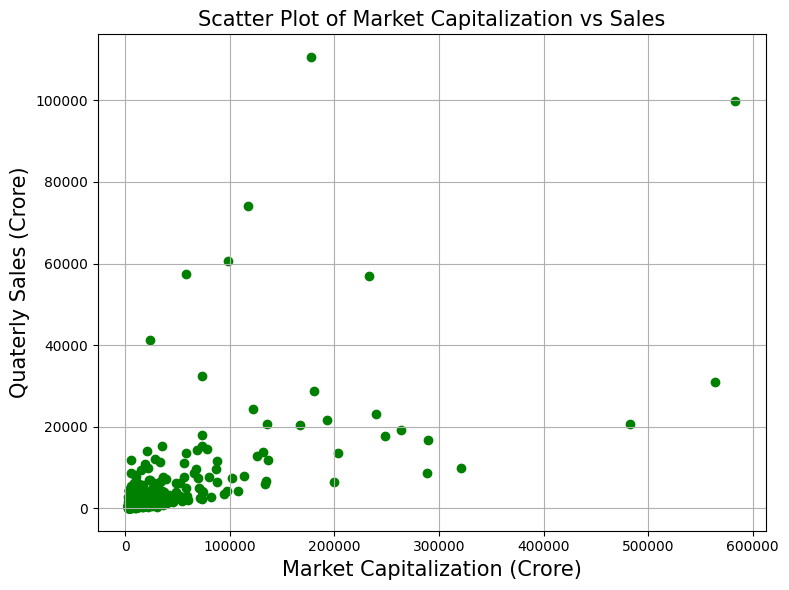

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'], color='green')
plt.title('Scatter Plot of Market Capitalization vs Sales', fontsize=15)
plt.xlabel('Market Capitalization (Crore)', fontsize=15)
plt.ylabel('Quaterly Sales (Crore)', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Top and Bottom 10 Companies by Market Capitalization

Top 10 Companies by Market Capitalization:
             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


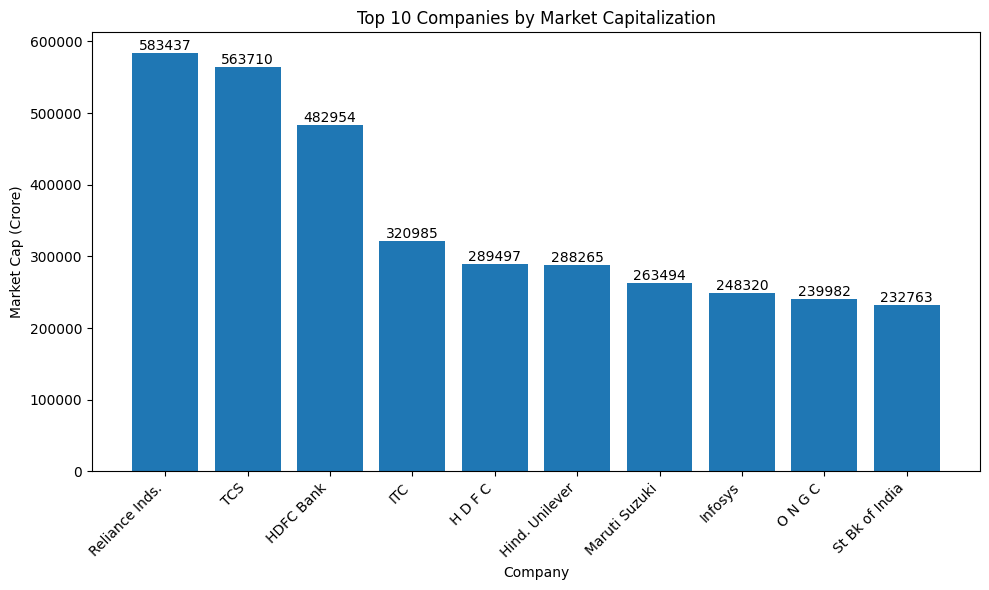

In [28]:
df_sorted = df.sort_values(by='Mar Cap - Crore', ascending=False)

top_10_companies = df_sorted.head(10)

print("Top 10 Companies by Market Capitalization:")
print(top_10_companies[['Name', 'Mar Cap - Crore']])

plt.figure(figsize=(10, 6))
ax=plt.bar(top_10_companies['Name'], top_10_companies['Mar Cap - Crore'])
plt.bar_label(ax)
plt.xlabel('Company')
plt.ylabel('Market Cap (Crore)')
plt.title('Top 10 Companies by Market Capitalization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bottom 10 Companies by Market Capitalization:
              Name  Mar Cap - Crore
0  Natl.Fertilizer          3017.07
1    Orient Cement          3024.32
2            NOCIL          3026.26
3  Lak. Vilas Bank          3029.57
4      Prime Focus          3031.50
5    Va Tech Wabag          3041.93
6     Deepak Fert.          3079.06
7  Star Ferro Cem.          3115.98
8  Kaveri Seed Co.          3125.83
9  Firstsour.Solu.          3139.94


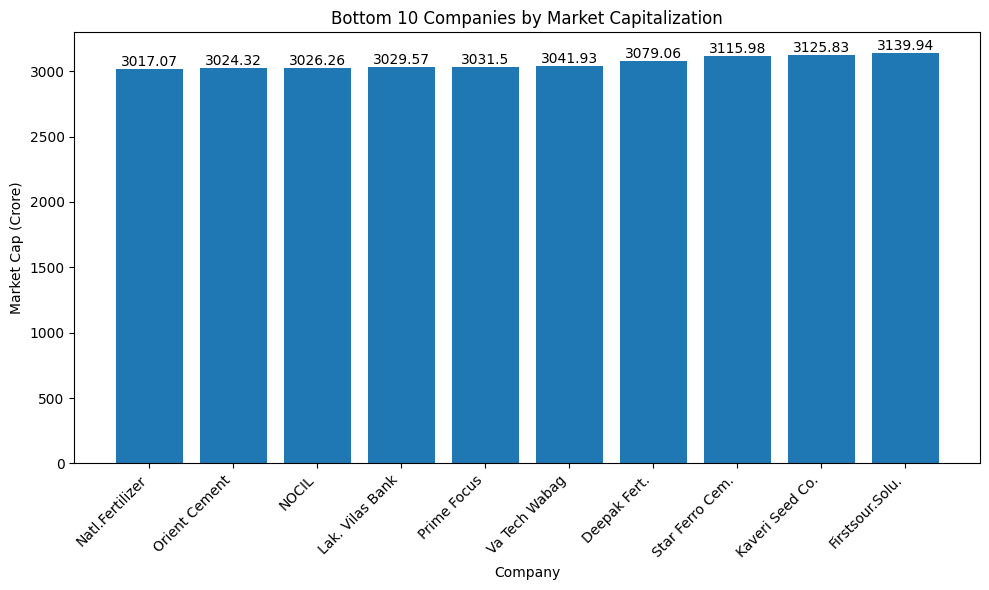

In [29]:
df_sorted = df.sort_values(by='Mar Cap - Crore', ascending=True)

bottom_10_companies = df_sorted.head(10)
bottom_10_companies=bottom_10_companies.reset_index(drop=True)
print("Bottom 10 Companies by Market Capitalization:")
print(bottom_10_companies[['Name', 'Mar Cap - Crore']])
plt.figure(figsize=(10, 6))
ax=plt.bar(bottom_10_companies['Name'], bottom_10_companies['Mar Cap - Crore'])
plt.bar_label(ax)
plt.xlabel('Company')
plt.ylabel('Market Cap (Crore)')
plt.title('Bottom 10 Companies by Market Capitalization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Companies by Quarterly Sales:
              Name  Sales Qtr - Crore
0          I O C L          110666.93
1   Reliance Inds.           99810.00
2      Tata Motors           74156.07
3          B P C L           60616.36
4          H P C L           57474.25
5   St Bk of India           57014.08
6   Rajesh Exports           41304.84
7       Tata Steel           32464.14
8              TCS           30904.00
9  Larsen & Toubro           28747.45


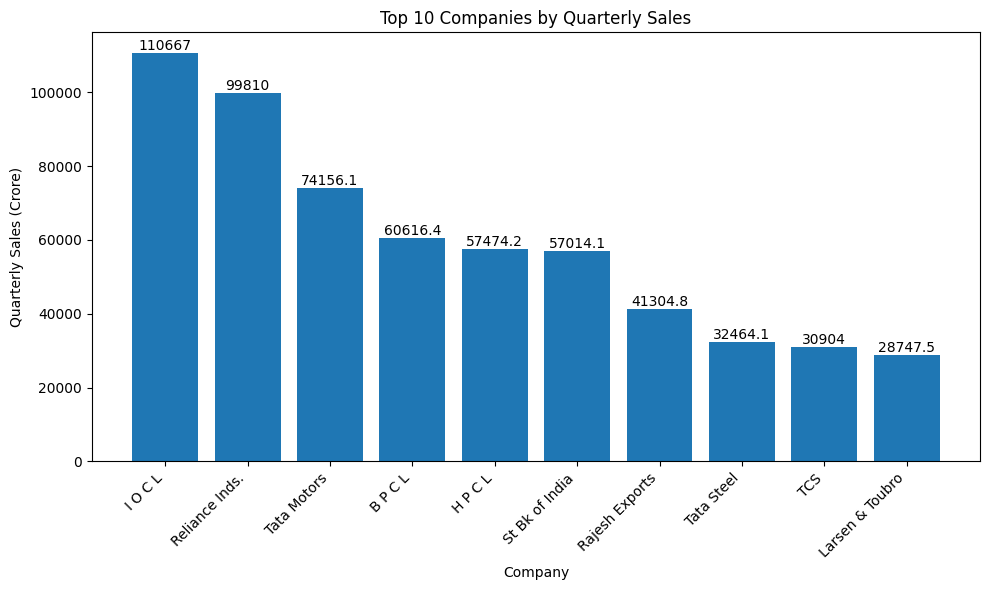

In [30]:
df_sorted = df.sort_values(by='Sales Qtr - Crore', ascending=False)

top_10_companies = df_sorted.head(10)
top_10_companies=top_10_companies.reset_index(drop=True)
print("Top 10 Companies by Quarterly Sales:")
print(top_10_companies[['Name', 'Sales Qtr - Crore']])
plt.figure(figsize=(10, 6))
ax=plt.bar(top_10_companies['Name'], top_10_companies['Sales Qtr - Crore'])
plt.bar_label(ax)
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')
plt.title('Top 10 Companies by Quarterly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bottom 10 Companies by Quarterly Sales:
               Name  Sales Qtr - Crore
0             SPARC              19.42
1   Tata Inv.Corpn.              47.02
2  Central Dep. Ser              47.24
3  Multi Comm. Exc.              60.97
4       Forbes & Co              63.93
5  Indian Energy Ex              64.75
6       La Opala RG              69.77
7   Kaveri Seed Co.              70.64
8      CARE Ratings              74.82
9   Thyrocare Tech.              77.84


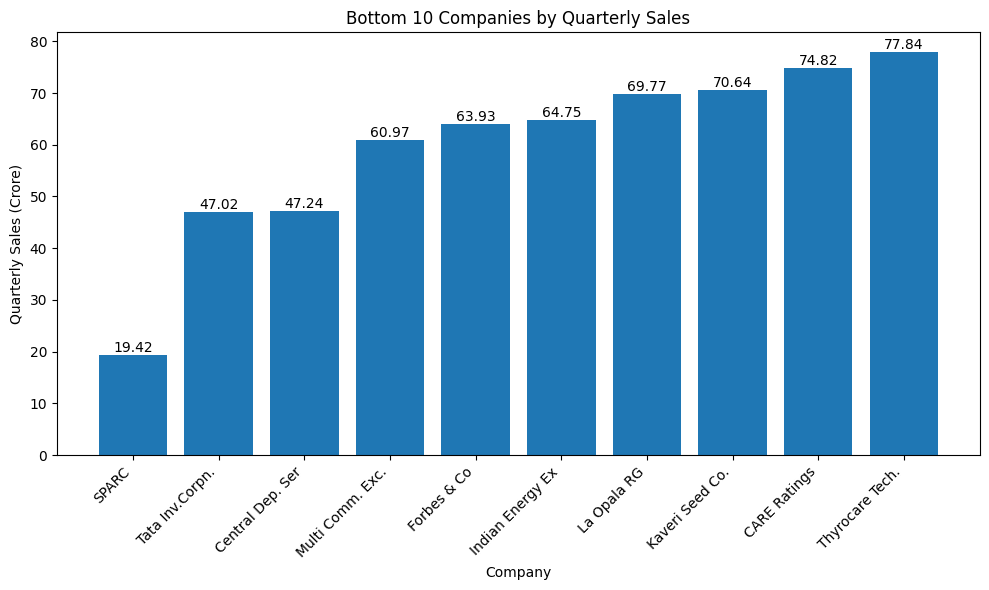

In [31]:
df_sorted = df.sort_values(by='Sales Qtr - Crore', ascending=True)

bottom_10_companies = df_sorted.head(10)
bottom_10_companies=bottom_10_companies.reset_index(drop=True)
print("Bottom 10 Companies by Quarterly Sales:")
print(bottom_10_companies[['Name', 'Sales Qtr - Crore']])
plt.figure(figsize=(10, 6))
ax=plt.bar(bottom_10_companies['Name'], bottom_10_companies['Sales Qtr - Crore'])
plt.bar_label(ax)
plt.xlabel('Company')
plt.ylabel('Quarterly Sales (Crore)')
plt.title('Bottom 10 Companies by Quarterly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
Q1 = np.percentile(df['Mar Cap - Crore'], 25)
Q3 = np.percentile(df['Mar Cap - Crore'], 75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mar = df[(df['Mar Cap - Crore'] < lower_bound) | (df['Mar Cap - Crore'] > upper_bound)]
outliers_mar=outliers_mar.reset_index(drop=True)
print("Outliers based on IQR method:")
print(outliers_mar[['Name', 'Mar Cap - Crore']])

Outliers based on IQR method:
                Name  Mar Cap - Crore
0     Reliance Inds.        583436.72
1                TCS        563709.84
2          HDFC Bank        482953.59
3                ITC        320985.27
4            H D F C        289497.37
5     Hind. Unilever        288265.26
6      Maruti Suzuki        263493.81
7            Infosys        248320.35
8            O N G C        239981.50
9     St Bk of India        232763.33
10        ICICI Bank        203802.35
11   Kotak Mah. Bank        199253.77
12        Coal India        192677.98
13   Larsen & Toubro        180860.74
14           I O C L        178017.48
15     Bharti Airtel        167131.29
16         Axis Bank        136380.76
17              NTPC        135390.53
18  Sun Pharma.Inds.        134241.36
19         Hind.Zinc        133266.56
20             Wipro        131840.57
21  HCL Technologies        126335.27
22           Vedanta        122184.17
23       Tata Motors        117071.87
24    UltraTech Cem.

In [33]:
Q1 = np.percentile(df['Sales Qtr - Crore'], 25)
Q3 = np.percentile(df['Sales Qtr - Crore'], 75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sal = df[(df['Sales Qtr - Crore'] < lower_bound) | (df['Sales Qtr - Crore'] > upper_bound)]
outliers_sal=outliers_sal.reset_index(drop=True)
print("Outliers based on IQR method:")
print(outliers_sal[['Name', 'Sales Qtr - Crore']])

Outliers based on IQR method:
               Name  Sales Qtr - Crore
0    Reliance Inds.           99810.00
1               TCS           30904.00
2         HDFC Bank           20581.27
3               ITC            9772.02
4           H D F C           16840.51
..              ...                ...
59  Tata Motors-DVR            7769.67
60   Union Bank (I)            8260.47
61      Jet Airways            6086.20
62  Redington India           11728.40
63          C P C L            8587.17

[64 rows x 2 columns]


In [34]:
df.to_csv("Financial Analytics Dataset.csv", index=False)